<p align="center">
  <img src="img/airline.jpg" width="1000" title="img-principal">
</p>

# CONTEXTO DO PROBLEMA

A **Airline** é uma companhia aérea que tem como modelo de negócio vender passagens aéreas e levar pessoas até o destino de suas viagens e seu diferencial competitivo é o preço baixo em comparação com o mercado. Em uma reunião, os diretores notaram que os preços da concorrência estavam igualando ao da Airline, e agora a missão é se diferenciar com experiência do cliente. 

Como resultado, foi identificado que 45% dos passageiros são insatisfeitos e o objetivo é diminuir a taxa de insatisfação. Eles decidiram que precisam melhorar/mudar seus serviços e, para isso, querem uma análise para identificar as causas das insatisfações e o que deverá ser melhorarado ou mudado.

## ENTENDIMENTO DO NEGÓCIO


#### Motivação:

- Conseguir manter um diferencial competitivo em comparação com outras companhias aéreas.

#### Causa Raiz do Problema:
- Alta taxa de passageiros insatisfeitos.

#### Entrega da Solução: 

- Lista dos 5 serviços que mais causam insatisfação.
- Sugestões de quais serviços devem ser melhorados.
- Dashboard para acompanhamento da satisfação.

# 0.0 IMPORTAÇÕES

In [109]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from scipy import stats

## 0.1 Funções Auxiliares

In [110]:
# Custom color
paleta1 = ['#87cefa']
paleta2 = ['#f08080','#87cefa']
paleta3 = ['#f08080', '#87cefa', '#74e3a0']
paleta4 = ['#f08080', '#87cefa', '#82ffb4', '#deb1fc', '#ffbe9e']

# Custom font size
plt.rcParams.update({'font.size': 13})
    
    
# Function to show 3 figure countplot 
def univariate_analysis(col1, col2, col3, data):
    
    # Figure 1
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    sns.countplot(x=col1, data=data, palette=paleta3, ec='k')
    plt.xlabel('')
    plt.ylabel('Qty')
    plt.title(col1)

    # Figure 2
    plt.subplot(1, 3, 2)
    sns.countplot(x=col2, data=data, palette=paleta3, ec='k')
    plt.xlabel('')
    plt.ylabel('')
    plt.title(col2)
        
     # Figure 3   
    plt.subplot(1, 3, 3)
    sns.countplot(x=col3, data=data, palette=paleta3, ec='k')
    plt.xlabel('')
    plt.ylabel('')
    plt.title(col3)    
        

# Function to show category variables correlation using cramer v        
def cramer_v(x, y):
    
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))


# Function to show correlation matrix
def show_matrix(col, data, output='list'):

    rows = []
    index = []
    columns = []

    for c in data.columns:

        result = cramer_v(x=data[str(col)], y=data[str(c)])

        rows.append(result)
        index.append(str(c))
        columns.append(str(col))
        
    if output == 'list':
        return rows
    
    elif output == 'dict':
        return pd.DataFrame(rows, index=index, columns=[str(col)])
    
    else:
        print('\033[31mValueError: output must be either "list" or "dict"')
        

# Function to show top 5 bad services        
def show_result():
    
    # Services
    service = ['seat_comfort', 'departure_arrival_time_convenient', 'food_and_drink', 'gate_location',
               'inflight_wifi_service', 'inflight_entertainment', 'online_support', 'ease_of_online_booking',
               'on_board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'cleanliness',
               'online_boarding']

    count_bad = []
    index = []
    paleta = []
    count = 0 

    for i in service:

        filter_h20 = len(data[data[i] <= 3])
        count_bad.append(filter_h20)
        index.append(i)

    service_bad = pd.DataFrame(count_bad, columns=['bad'], index=index)
    plt.figure(figsize=(13.2, 5))
    
    # Custom color
    order = service_bad['bad'].sort_values(ascending=False).index
    for svc in order:
        count += 1

        if count in [1, 2, 3, 4, 5]:
            paleta.append('#f08080')

        else:
            paleta.append('#a5d4f2')

    # Show figure
    sns.barplot(y=service_bad.index, x=service_bad['bad'], ec='k', order=order, palette=paleta)
    plt.title('Piores serviços');

## 0.2 Carregamento de Dados

In [111]:
data = pd.read_csv('data/Invistico_Airline.csv')
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# 1.0 DESCRIÇÃO DE DADOS

## 1.1 Renomeando Colunas

In [112]:
cols_old = data.columns

# Parse variable to format snakecase
snakecase = lambda x: x.replace(' ', '_').replace('-', '_').replace('/', '_').lower()
cols_new = list(map(snakecase, cols_old))

data.columns = cols_new
data.columns

Index(['satisfaction', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'flight_distance', 'seat_comfort',
       'departure_arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support',
       'ease_of_online_booking', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes'],
      dtype='object')

## 1.2 Dimensão de Dados

In [113]:
n_row = data.shape[0]
n_col = data.shape[1]

print(f'Qtd. de linhas: {n_row}')
print(f'Qtd. de colunas {n_col}')

Qtd. de linhas: 129880
Qtd. de colunas 23


## 1.3 Tipo de Dados

In [114]:
data.dtypes

satisfaction                          object
gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
seat_comfort                           int64
departure_arrival_time_convenient      int64
food_and_drink                         int64
gate_location                          int64
inflight_wifi_service                  int64
inflight_entertainment                 int64
online_support                         int64
ease_of_online_booking                 int64
on_board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
cleanliness                            int64
online_boarding                        int64
departure_delay_in_minutes             int64
arrival_de

## 1.4 Verificação de NaN

In [115]:
data.isna().sum()

satisfaction                           0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure_arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
on_board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
dtype: int64

## 1.5 Preenchimento de NaN

Será divido o preenchimento de NaN em 2 etapas. 

**1º:** assumiremos que não há vôos cancelados, devido a coluna 'departure_delay_in_minutes' indicar o atraso de **partida** do avião, está não possui NaN.
Com isso, identificaremos o maior caso de atraso na partida, mas que ainda assim o avião chegou **sem atraso** no destino. Assumiremos que atrasos de partida menor que este caso, o avião chegará no horario.


**2º:** Um dos principais influenciadores na hora da chegada, é o horario que o avião saiu, então será usado isso no preenchimento. Nessa atapa, identificaremos a mediana sobre a diferença de partida e chegada do avião em vôos que possuiram algum atraso. Para preencher, a mediana será somada com cada atraso de partida.

In [116]:
# -- 1º step
arrivalOk_departureDelay = data[(data['arrival_delay_in_minutes'] == 0.0) & (data['departure_delay_in_minutes'] > 1)]

delay_max = arrivalOk_departureDelay['departure_delay_in_minutes'].max()

no_delay = data[['arrival_delay_in_minutes', 'departure_delay_in_minutes']].apply(lambda x: 0.0 if pd.isna(x['arrival_delay_in_minutes']) 
                                                                                                and x['departure_delay_in_minutes'] <= delay_max 
                                                                                                else x['arrival_delay_in_minutes'], axis=1
)

data['arrival_delay_in_minutes'] = no_delay


# -- 2º step
median_diference_delay = data[['departure_delay_in_minutes', 'arrival_delay_in_minutes']].apply(
        lambda x: (x['arrival_delay_in_minutes'] - x['departure_delay_in_minutes']) if pd.notnull(x['arrival_delay_in_minutes']) 
                                                                                    and x['arrival_delay_in_minutes'] > 0 
                                                                                    and x['departure_delay_in_minutes'] > 0 
                                                                                    else np.nan, axis=1).median()

arrival_subs = data[['departure_delay_in_minutes', 'arrival_delay_in_minutes']].apply(
    lambda x: (x['departure_delay_in_minutes'] + median_diference_delay) if pd.isnull(x['arrival_delay_in_minutes']) 
                                                                         else x['arrival_delay_in_minutes'], axis=1
)

data['arrival_delay_in_minutes'] = arrival_subs
data.isna().sum()

satisfaction                         0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
seat_comfort                         0
departure_arrival_time_convenient    0
food_and_drink                       0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
on_board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
dtype: int64

## 1.6 Estatistica Descritiva

### 1.6.1 Atributos Numéricos

In [117]:
# numerical variables
num_atributes = data.select_dtypes(include=['int64', 'float64'])

describe = num_atributes.describe().T

skew = num_atributes.apply(lambda x: x.skew()) # Create skew 
kurtosis = num_atributes.apply(lambda x: x.kurtosis()) # Create Kurtosis

describe['skew'] = skew
describe['kurtosis'] = kurtosis

describe

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0,-0.003606,-0.719140
flight_distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0,0.466748,0.364306
seat_comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0,-0.091861,-0.943193
departure_arrival_time_convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0,-0.252282,-1.089371
food_and_drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0,-0.116813,-0.986728
gate_location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0,-0.053064,-1.089822
inflight_wifi_service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0,-0.191123,-1.121446
inflight_entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0,-0.604828,-0.532786
online_support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0,-0.575365,-0.810572
ease_of_online_booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0,-0.491720,-0.910654


**Inisght**:

<ins>Dsitribuição</ins>: Em distância do vôo, idade, atraso de chegada e partida há um grande range de valores e dados mais distantes da média. As variáveis que indicam sobre os serviços prestados possuem um range entre 0 e 5, indicando ser o nível de satisfação do passageiro em relação ao serviço. A maior parte das variáveis possuem uma skew negativa levando a distribuição dos dados se deslocar para a direita possuindo valores maiores.

<ins>Negócio</ins>: A idade média dos passageiros é de 39 anos e os atrasos dos aviões variam em cerca de 38 minutos por vôo. Na média, as distâncias dos vôos são de 1981km possuindo uma variação de 1027km e os passageiros atribuem nota 2 e 3 para os serviços, na média.

### 1.6.2 Atributos Categóricos

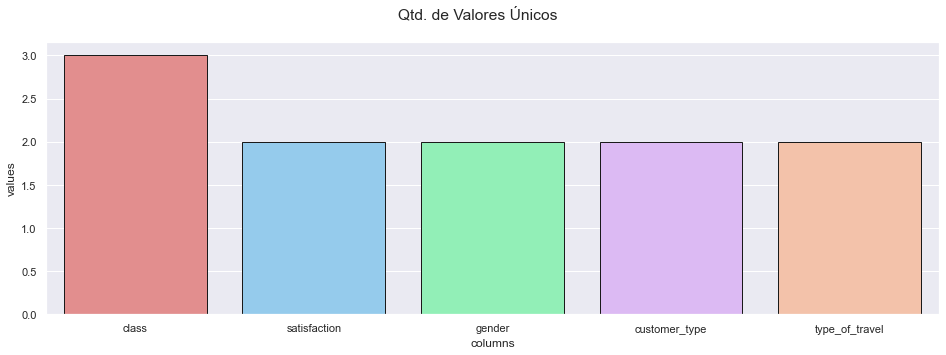

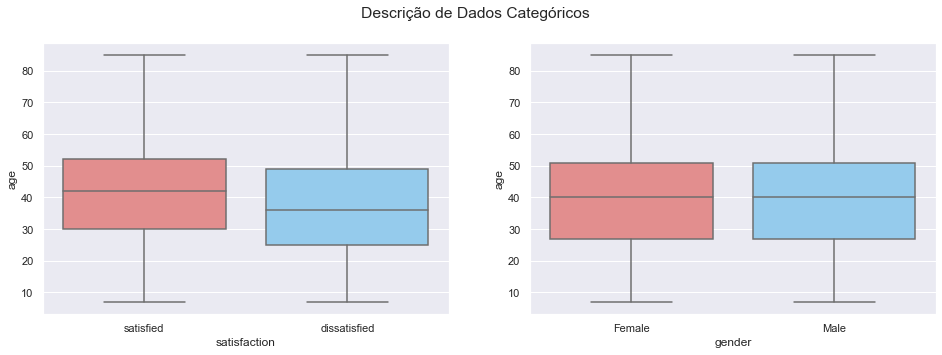

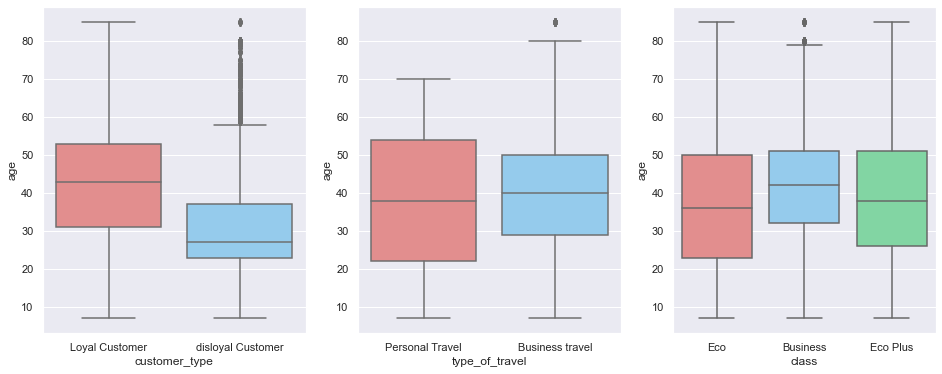

In [118]:
# Ctecorical variables
cat_atributes = data.select_dtypes(include=['object'])

# Unique values in the categorical variables
unique_values = cat_atributes.apply(lambda x: x.unique().shape[0]).sort_values(ascending=False).reset_index().rename(columns={0: 'values'})

# Figure 1
plt.figure(figsize=(16, 5))
sns.barplot(x='index', y='values', data=unique_values, palette=paleta4, ec='k')
plt.suptitle('Qtd. de Valores Únicos')
plt.xlabel('columns')

# Figure 2
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='satisfaction', y='age', data=data, palette=paleta2)
plt.suptitle('Descrição de Dados Categóricos')

# Figure 3
plt.subplot(1, 2, 2)
sns.boxplot(x='gender', y='age', data=data, palette=paleta2)

# Fugure 4
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='customer_type', y='age', data=data, palette=paleta2)

# Figure 5
plt.subplot(1, 3, 2)
sns.boxplot(x='type_of_travel', y='age', data=data, palette=paleta2)

# Figure 6
plt.subplot(1, 3, 3)
sns.boxplot(x='class', y='age', data=data, palette=paleta3);

**Inisght**:

<ins>Distribuição</ins>: As variáveis categóricas possuem 2 ou 3 possíveis valores. Clientes fiéis possuem maior distribuição em idades maiores comprarado a clientes infiéis. Viagens pessoais possuem idades mais despensas e viagens de Negócio maior concentração. Nas classes, possui maior dispensão das idades na classe Eco e Eco Plus, já na classe Business, há maior concentração.


<ins>Negócio</ins>: Em relação a satisfação, as idades dos passageiros satisfeitos e insatisfeitos estão concentradas entre 30 e 50 anos e no sexo ocorre o mesmo. Já no tipo de cliente, clientes fiéis possuem maior concentração de idade entre 32 a 52 anos e clientes infiéis entre 20 e 35 anos. Em viagens pessoais, há maior concentração em passageiros com idades entre 22 a 55 anos, em viagens de negócio entre 30 a 50 anos. E, na classe Eco, há maior concentração de passageiros possuindo idades de 25 a 50 anos, na classe Business, entre 33 a 52 anos e na classe Eco Plus entre 28 a 50 anos. 

# 2.0 FEATURE ENGINEERING

## 2.1 Mapa Mental de Hipóteses

<p align="center">
  <img src="img/mindmap.JPG" width="1000" title="img-principal">
</p>

## 2.2 Criação de Hipóteses

### 2.2.1 Hipóteses Passageiros

**1.** Passageiros com idade menor que 30 anos possuem maior satisfação.

**2.** Passageiros que realizam viagens de negócio possuem maior satisfação.

**3.** Passageiros da classe Business possuem menor satisfação.

**4.** Passageiros do sexo masculino possuem menor satisfação.

**5.** Passageiros fiéis possuem maior satisfação.

### 2.2.2 Hipóteses Passagem

**1.** Viagens com distancias menores possuem maior satisfação.

### 2.2.3 Hipóteses Avião

**1.** Aviões que obtem poltronas avaliadas com notas maiores que 3 possuem passageiros MAIS satisfeitos.

**2.** Aviões que saem com atrasos curtos possuem MAIS passageiros satisfeitos.

**3.** Aviões que obtem limpeza avaliada com nota menor que 2 possuem MENOS passageiros satisfeitos.

### 2.2.4 Hipóteses Serviços

**1.** Quanto maior a nota de entretenimento no vôo, menor é a insatisfação.

**2.** Quanto maior a nota de localização do portão de embarque no vôo, menor é a insatisfação.

**3.** Quanto maior a nota de manuseio das bagagens no vôo, menor é a insatisfação.

**4.** Quanto maior a nota da comida e bebida no vôo, menor é a insatisfação. 

**5.** Quanto maior a nota do Wi-fi no vôo, menor é a insatisfação.  

**6.** Quanto maior a nota do serviço de quarto, menor é a insatisfação. 

**7.** Quanto maior a nota do serviço de check-in, menor é a insatisfação. 

### 2.2.5 Hipóteses Atendimento

**1.** Quanto maior a nota de facilidade na reserva, menor é a insatisfação.

**2.** Quanto maior a nota do suporte online, menor é a insatisfação.

**3.** Quanto maior a nota de Onboards, menor é a insatisfação.

**4.** Quanto maior a nota de Onboards online, menor é a insatisfação.

## 2.3 FEATURE ENGINEERING

In [119]:
# Creating: type_flight
flight_distance_mean = data['flight_distance'].mean()
data['type_flight'] = data['flight_distance'].apply(lambda x: 'long' if x > flight_distance_mean else 'short')


# Creating: type_departure_delay
departure_delay_mean = data[data['departure_delay_in_minutes'] > 0]['departure_delay_in_minutes'].mean()
data['type_departure_delay'] = data['departure_delay_in_minutes'].apply(lambda x: 'no_delay' if x == 0 else 'long' if x > departure_delay_mean else 'short')


# Creating: type_arrival_delay
arrival_delay_mean = data[data['arrival_delay_in_minutes'] > 0]['arrival_delay_in_minutes'].mean()
data['type_arrival_delay'] = data['arrival_delay_in_minutes'].apply(lambda x: 'no_delay' if x == 0 else 'long' if x > arrival_delay_mean else 'short')


# Creating: average_grade_final
service = data[['seat_comfort', 'departure_arrival_time_convenient', 'food_and_drink',
                'gate_location', 'inflight_wifi_service', 'inflight_entertainment',
                'online_support', 'ease_of_online_booking', 'on_board_service',
                'leg_room_service', 'baggage_handling', 'checkin_service',
                'cleanliness', 'online_boarding']]

data['average_grade_final'] = service.apply(lambda x: x.mean(), axis=1).round()
 
    
# Creating: sum_grade_final
data['sum_grade_final'] = service.apply(lambda x: x.sum(), axis=1)

# 3.0 ANÁLISE EXPLORATÓRIA DOS DADOS

## 3.1 Análise Univariada

### 3.1.2 Variavel Principal

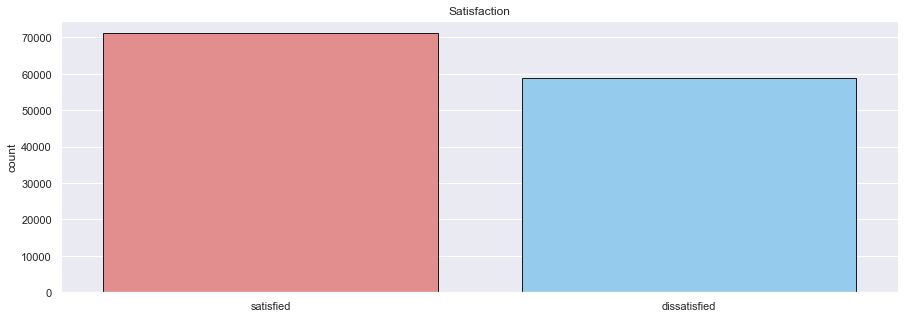

In [120]:
plt.figure(figsize=(15, 5))
sns.countplot(x='satisfaction', data=data, ec='k', palette=paleta2)
plt.xlabel('')
plt.title('Satisfaction');

**Insight**:

Mesmo a companhia aérea Airline possuindo mais passageiros satisfeitos, a quantidade de passageiros que demonstram insatisfação ainda é alta. Uma diferença em cerca de 1200 passageiros. Interessante notar que, 45% das pessoas que voaram com a Arline foram insatisfeitas.

### 3.1.3 Variavel Numérica

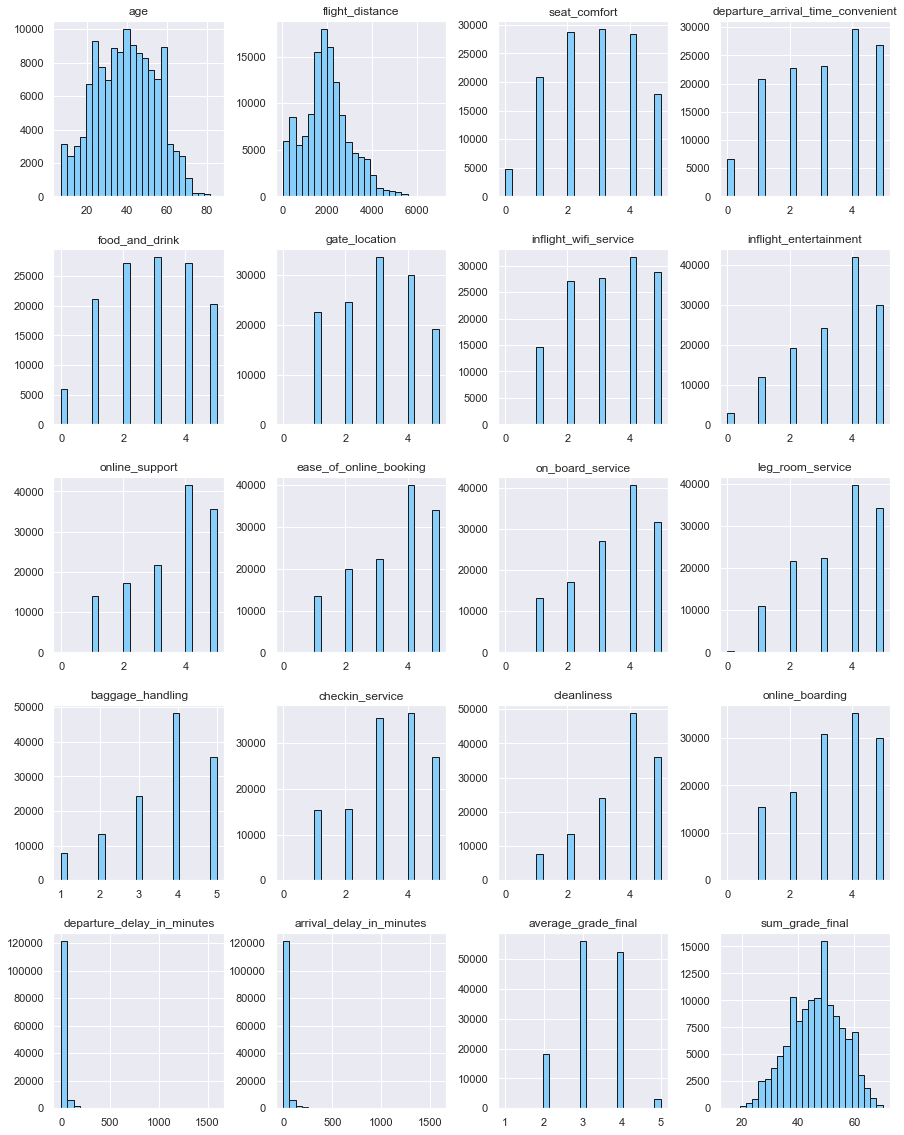

In [121]:
num_atributes = data.select_dtypes(include=['int64', 'float64'])
num_atributes.hist(figsize=(15, 20), ec='k', bins=25, color=paleta1);

**Insight**:

Há maior distribuição de idades entre passageiros com 20 e 60 anos e vôos com distância em cerca de 2000km. Em relação aos serviços, o conforto da poltrona, previsão de chegada no destino, comida, localização do portão e o serviço wifi possuem maior distribuição entre notas de 1 a 5, variando mais. Em outros serviços, a distribuição está em torno de notas 3 a 5, fazendo com que notas 0 sejam mais raras. Por fim, a distribuição de atrasos está próxima do zero indicando não possuir muitos atrasos grandes. A nota média das notas dos serviços de cada passageiros possui uma distribuição entre 3 e 4 e a soma final das notas possui uma distribuição bem próxima da normal.

### 3.1.4 Variavel Categórica

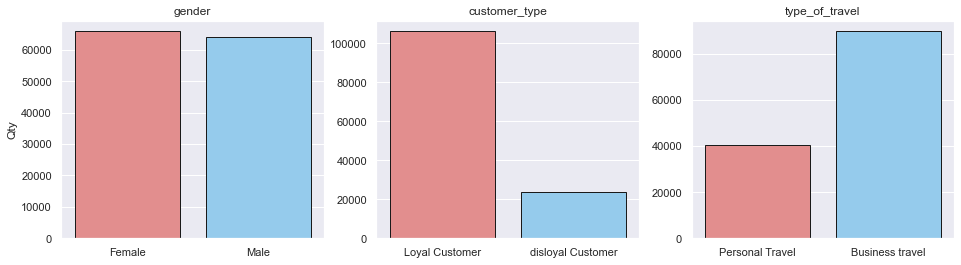

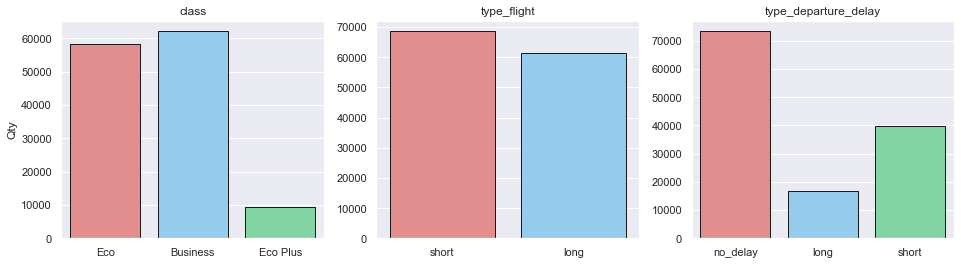

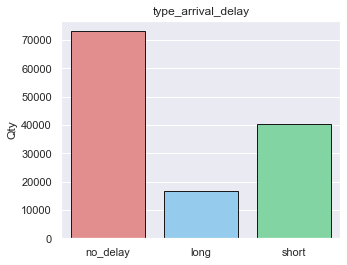

In [122]:
# Categorical variables
categories = data.select_dtypes(include='object')

# Show 6 figure
univariate_analysis(col1='gender', col2='customer_type', col3='type_of_travel', data=data)
univariate_analysis(col1='class', col2='type_flight', col3='type_departure_delay', data=data)

# 7º figure
plt.figure(figsize=(5, 4))
sns.countplot(x='type_arrival_delay', data=data, palette=paleta3, ec='k')
plt.xlabel('')
plt.ylabel('Qty')
plt.title('type_arrival_delay');

**Insight:**

Airline possui a mesma quantidade de passageiros com o sexo masculino e feminino e a maior parte são clientes fiéis. A maior parte dos pasageiros realizam viagens de negócio e ficam na classe Eco ou Business. Sobre os vôos, na maioria há vôos com distâncias menores e a maior parte não possui atraso, quando há, o atraso é considerado pequeno.

## 3.2 Análise Bivariada

### H1. Passageiros com idade menor que 30 anos possuem maior satisfação.

**FALSA** Passageiros com idade MAIOR que 30 anos possuem MAIOR satisfação.

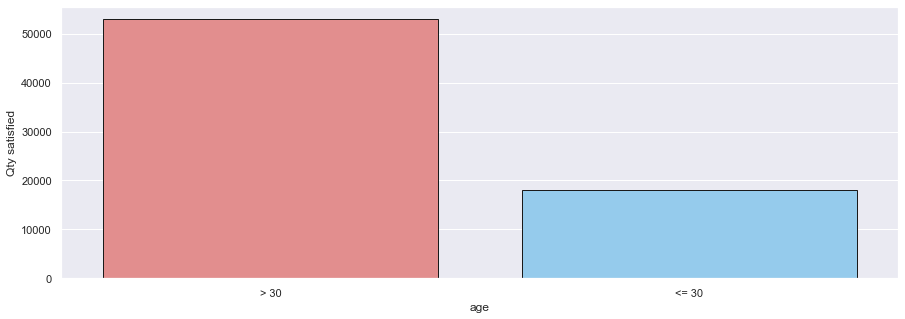

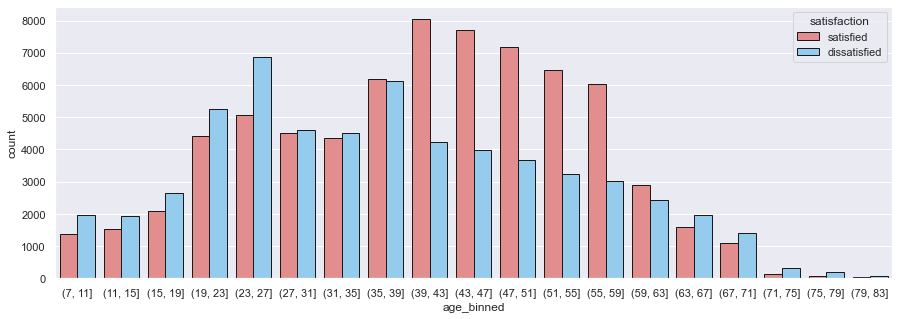

In [123]:
# Figure 1
plt.figure(figsize=(15, 5))
aux1 = data[data['satisfaction'] == 'satisfied']
aux2 = aux1['age'].apply(lambda x: '<= 30' if x <= 30 else '> 30').reset_index()
sns.countplot(x='age', data=aux2, palette=paleta2, ec='k')
plt.ylabel('Qty satisfied')

# Figure 2
plt.figure(figsize=(15, 5))
bins = list(np.arange(7, 85, 4)) 
data['age_binned'] = pd.cut(data['age'], bins=bins) # Grouped age 
sns.countplot(x='age_binned', data=data, hue='satisfaction', palette=paleta3, ec='k');

### H2. Passageiros que realizam viagens de negócio possuem maior satisfação.

**VERDADEIRA** Passageiros que realizam viagens de negócio possuem MAIOR satisfação.

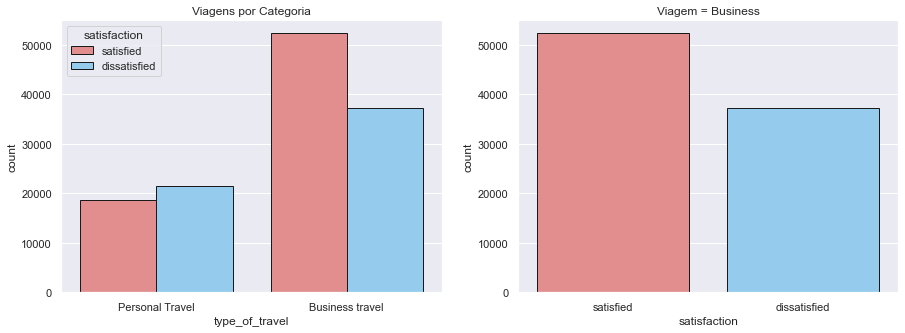

In [124]:
# Figure 1
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='type_of_travel', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Viagens por Categoria')

# Figure 2
plt.subplot(1, 2, 2)
filter_h2 = data[data['type_of_travel'] == 'Business travel']
sns.countplot(x='satisfaction', data=filter_h2, ec='k', palette=paleta2)
plt.title('Viagem = Business');

### H3. Passageiros da classe Business possuem maior satisfação.

**VERDADEIRA** Passageiros da classe Business possuem MAIOR satisfação.

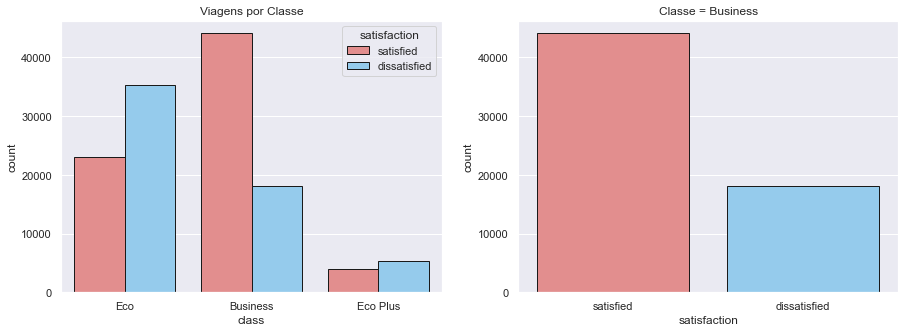

In [125]:
# Figure 1
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='class', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Viagens por Classe')

# Figure 2
plt.subplot(1, 2, 2)
filter_h3 = data[data['class'] == 'Business']
sns.countplot(x='satisfaction', data=filter_h3, ec='k', palette=paleta2)
plt.title('Classe = Business');

### H4 Passageiros do sexo masculino possuem maior satisfação.

**FALSA** Passageiros do sexo masculino possuem MENOR satisfação.

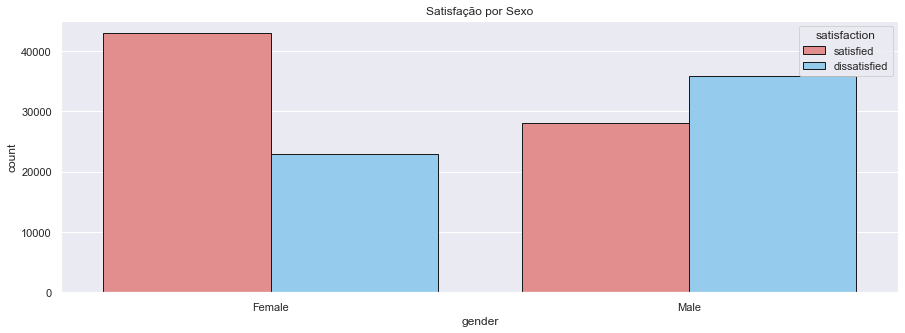

In [126]:
plt.figure(figsize=(15, 5))
sns.countplot(x='gender', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('Satisfação por Sexo');

### H5. Passageiros fiéis possuem maior satisfação.

**VERDADEIRA** Passageiros fiéis possuem MAIOR satisfação.

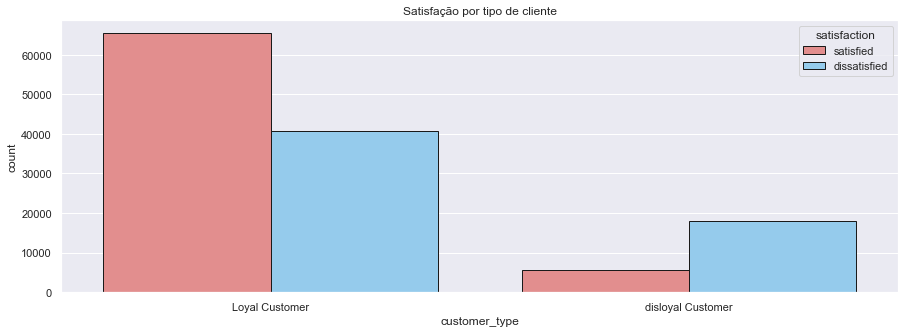

In [127]:
plt.figure(figsize=(15, 5))
sns.countplot(x='customer_type', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('Satisfação por tipo de cliente');

### H6.  Viagens com distâncias menores possuem maior satisfação.

**VERDADEIRA** Viagens com distâncias MENORES possuem MAIOR satisfação.

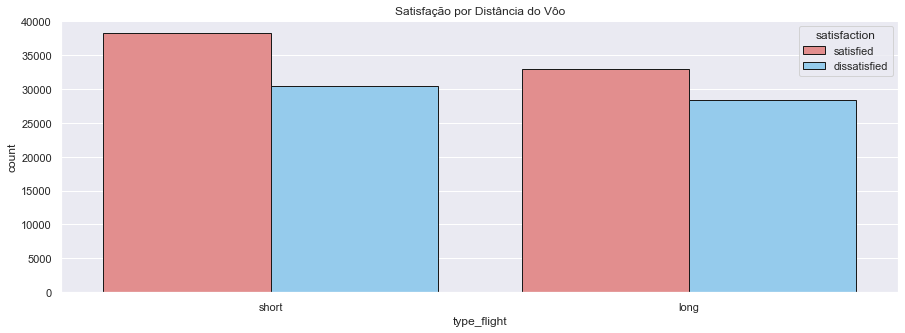

In [128]:
plt.figure(figsize=(15, 5))
sns.countplot(x='type_flight', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Satisfação por Distância do Vôo');

### H5. Aviões que obtem poltronas avaliadas com notas maiores que 3 possuem passageiros MAIS satisfeitos.

**VERDADEIRA** Aviões que obtem poltronas avaliadas com notas maiores que 3 possuem passageiros MAIS satisfeitos.

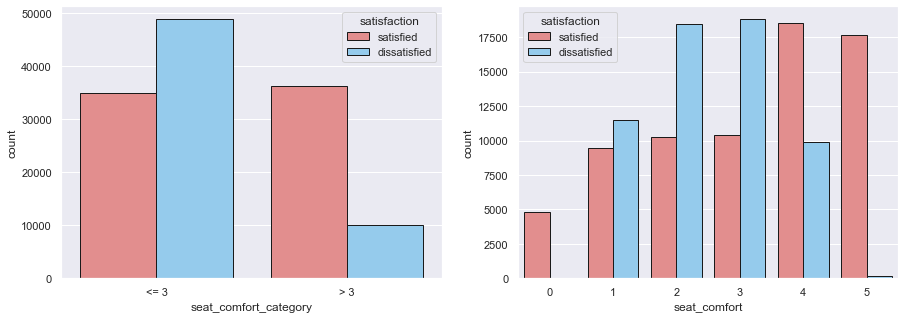

In [129]:
# Figure 1
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
data['seat_comfort_category'] = data['seat_comfort'].apply(lambda x: '<= 3' if x <= 3 else '> 3')
sns.countplot(x='seat_comfort_category', data=data, hue='satisfaction', palette=paleta3, ec='k')

# Figure 2
plt.subplot(1, 2, 2)
sns.countplot(x='seat_comfort', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

### H6. Aviões que saem com atrasos curtos possuem MAIS passageiros satisfeitos.

**VERDADEIRA** Aviões que saem com atrasos curtos possuem MAIS passageiros satisfeitos.

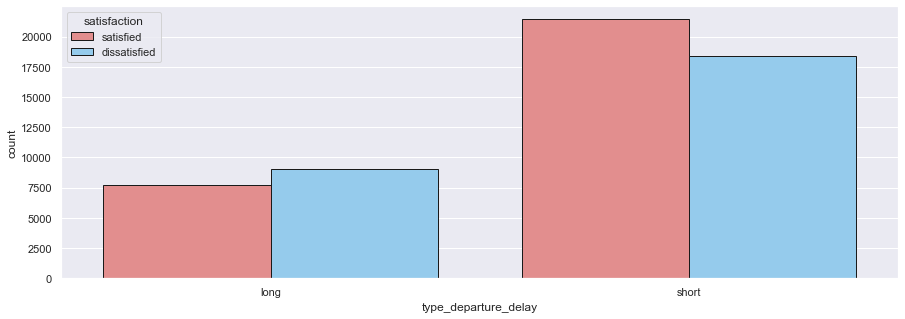

In [130]:
plt.figure(figsize=(15, 5))
aux1 = data[(data['type_departure_delay'] == 'long') | (data['type_departure_delay'] == 'short')]
sns.countplot(x='type_departure_delay', data=aux1, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

### H7. Aviões que obtem limpeza avaliada com nota menor que 2 possuem MENOS passageiros satisfeitos.

**VERDADEIRA** Aviões que obtem limpeza avaliada com nota menor que 2 possuem MENOS passageiros satisfeitos.

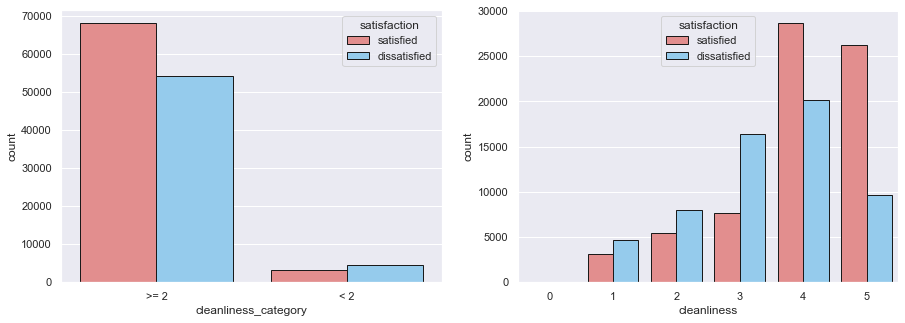

In [131]:
# Figure 1
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
data['cleanliness_category'] = data['cleanliness'].apply(lambda x: '< 2' if x < 2 else '>= 2')
sns.countplot(x='cleanliness_category', data=data, hue='satisfaction', palette=paleta3, ec='k')

# Figure 2
plt.subplot(1, 2, 2)
sns.countplot(x='cleanliness', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

### H8. Quanto maior a nota de entretenimento no vôo, menor é a insatisfação.

**VERDADEIRA** Quando a nota do entretenimento nos vôo chega em 4 ou 5 menor é a insatisfação em realação a satisfação.

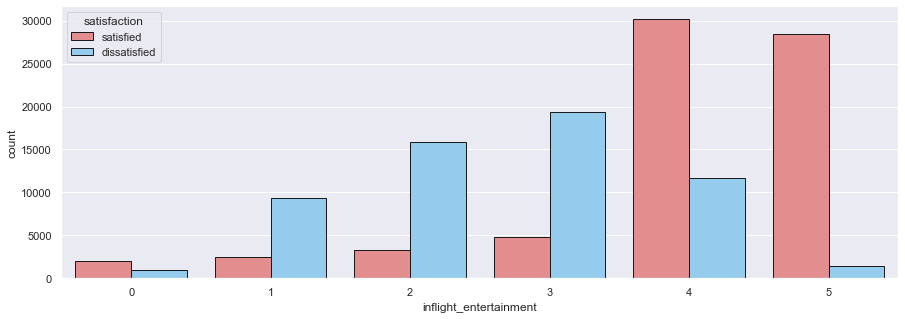

In [132]:
plt.figure(figsize=(15, 5))
sns.countplot(x='inflight_entertainment', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

### H9. Quanto maior a nota de localização do portão de embarque no vôo, menor é a insatisfação.

**FALSA** Quanto maior a nota de localização do portão de embarque no vôo, a insatisfação aumenta e só diminui em nota 5.

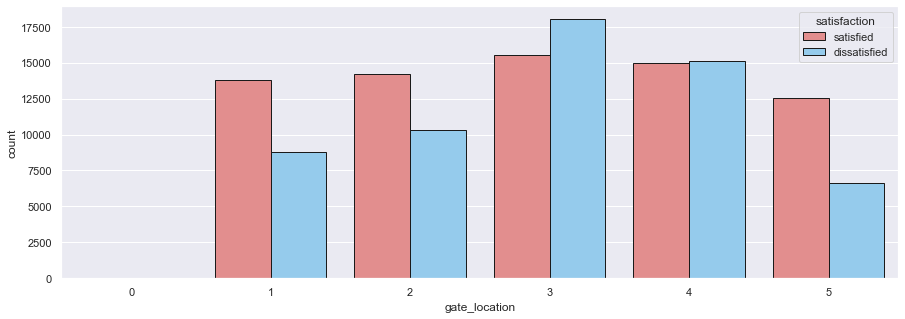

In [133]:
plt.figure(figsize=(15, 5))
sns.countplot(x='gate_location', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

### H10. Quanto maior a nota de manuseio das bagagens no vôo, menor é a insatisfação.

**VERDADEIRA** Quanto maior a nota de manuseio das bagagens no vôo, a insatisfação aumenta e só diminui em nota 5.

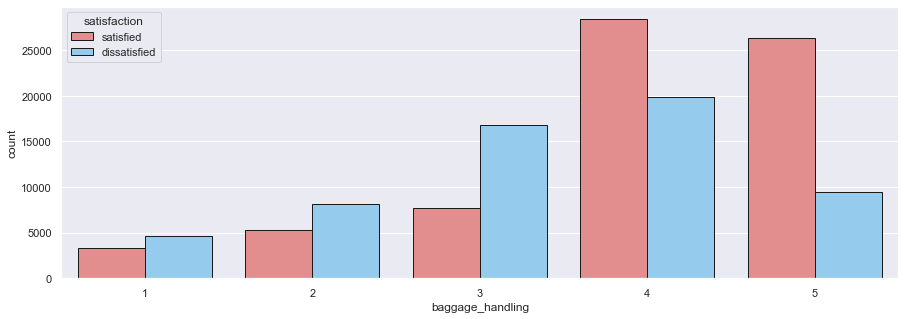

In [134]:
plt.figure(figsize=(15, 5))
sns.countplot(x='baggage_handling', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

### H11. Quanto maior a nota da comida e bebida no vôo, menor é a insatisfação.

**VERDADEIRA** Quanto maior a nota da comida e bebida no vôo, menor é a insatisfação.

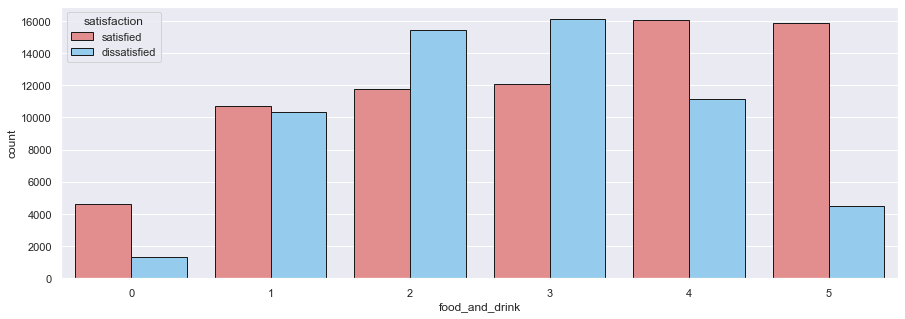

In [135]:
plt.figure(figsize=(15, 5))
sns.countplot(x='food_and_drink', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

### H12. Quanto maior a nota do Wi-fi no vôo, menor é a insatisfação.  

**VERDEIRA** Quanto maior a nota do Wi-fi no vôo, menor é a insatisfação.  

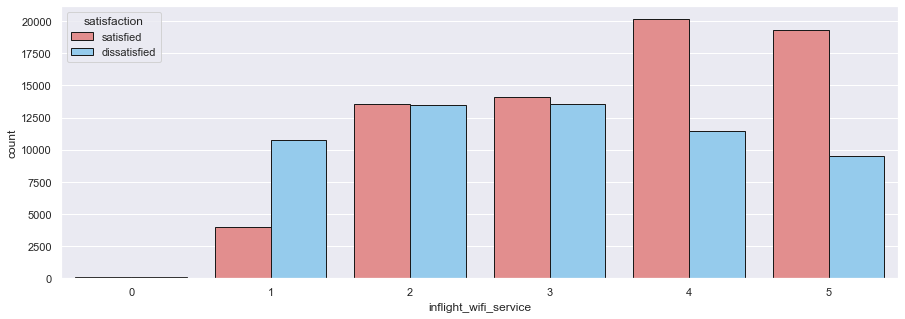

In [136]:
plt.figure(figsize=(15, 5))
sns.countplot(x='inflight_wifi_service', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

### H13. Quanto maior a nota do serviço de quarto, menor é a insatisfação. 

**VERDADEIRA** Quanto maior a nota do serviço de quarto, menor é a insatisfação. 

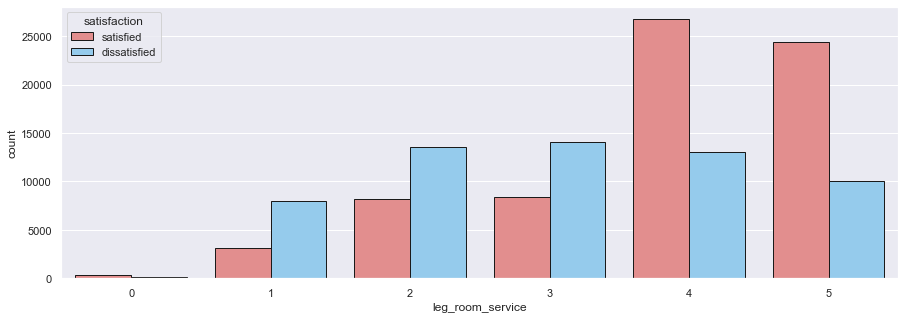

In [137]:
plt.figure(figsize=(15, 5))
sns.countplot(x='leg_room_service', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

### H14. Quanto maior a nota do serviço de check-in, menor é a insatisfação. 

**FALSA**  Quanto maior a nota do serviço de check-in, a insatisfação aumenta e só diminui em nota 5.


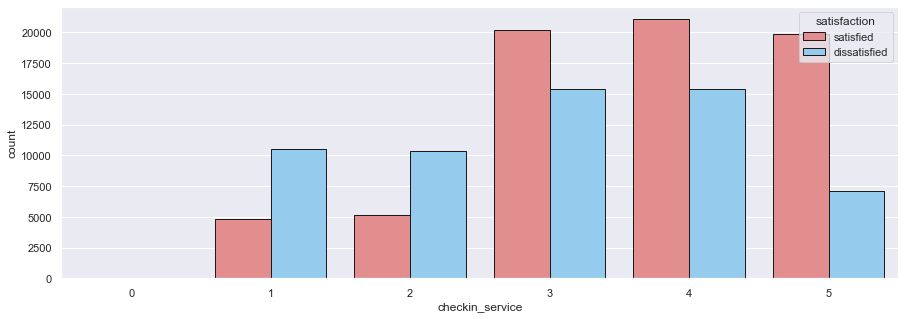

In [138]:
plt.figure(figsize=(15, 5))
sns.countplot(x='checkin_service', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

### H15. Quanto maior a nota de facilidade na reserva, menor é a insatisfação.

**VERDADEIRA** Quanto maior a nota de facilidade na reserva, menor é a insatisfação.

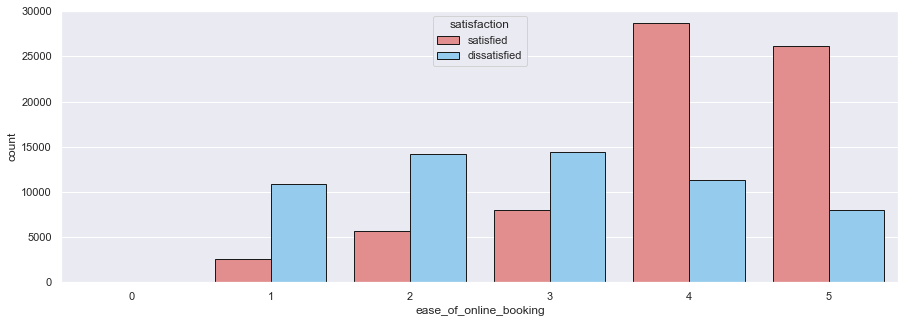

In [139]:
plt.figure(figsize=(15, 5))
sns.countplot(x='ease_of_online_booking', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

### H16. Quanto maior a nota do suporte online, menor é a insatisfação.

**VERDADEIRA** Quanto maior a nota do suporte online, menor é a insatisfação.


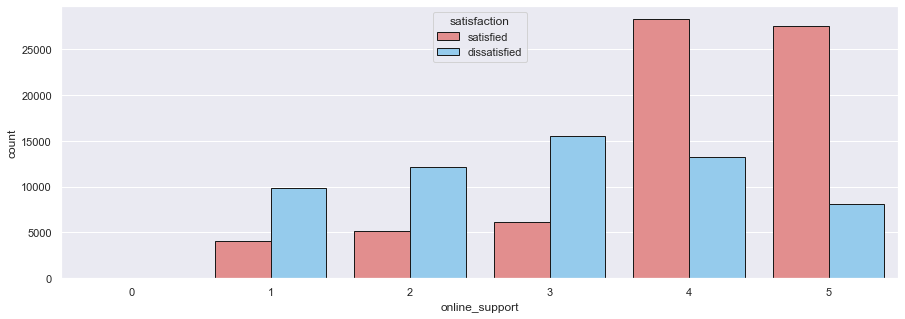

In [140]:
plt.figure(figsize=(15, 5))
sns.countplot(x='online_support', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

### H17. Quanto maior a nota de Onboards, menor é a insatisfação.

**VERDADEIRA** Quanto maior a nota de Onboards, menor é a insatisfação.

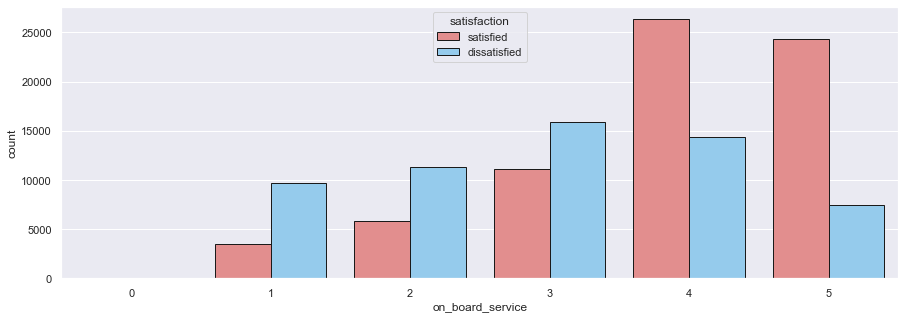

In [141]:
plt.figure(figsize=(15, 5))
sns.countplot(x='on_board_service', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

### H18. Quanto maior a nota de serviço de embarque online, menor é a insatisfação.

**VERDADEIRA** Quanto maior a nota de serviço de embarque online, menor é a insatisfação.

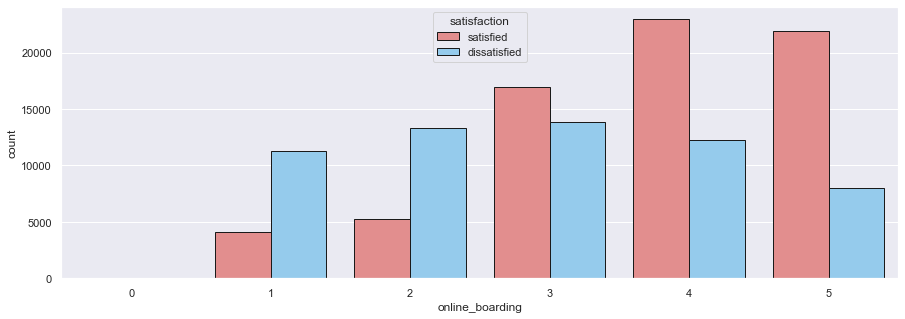

In [142]:
plt.figure(figsize=(15, 5))
sns.countplot(x='online_boarding', data=data, hue='satisfaction', palette=paleta2, ec='k')
plt.title('');

## 3.3 Análise Multivariada

### 3.3.1 Variavel Numérica

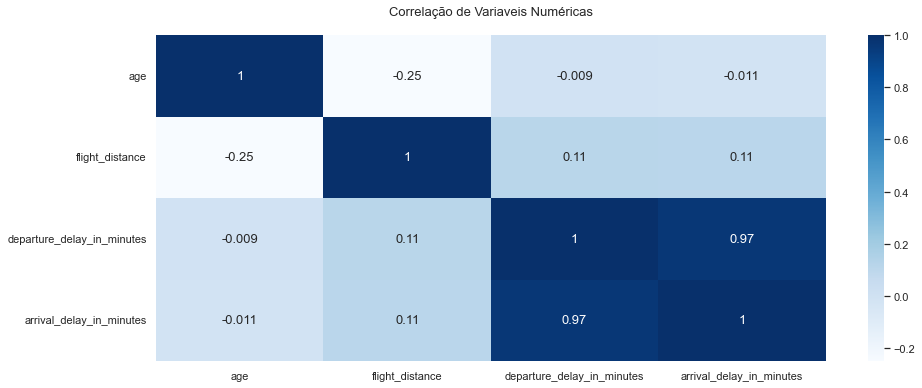

In [143]:
# Numerical variables
numerical = data[['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']]

# Create figure
plt.figure(figsize=(15, 6))
sns.heatmap(numerical.corr(method='pearson'), annot=True, cmap='Blues')
plt.title('Correlação de Variaveis Numéricas\n', fontsize=13);

**Inisght:**

Curiosamente, a idade possui uma cerca correlação negativa fraca com a distância de vôo do passageiro, ou seja, a medida que a idade aumenta a distância do vôo diminui. E como já esperado, o horário de partida do avião tem uma grande correlação com o horário de chegada no destino. No restante das variaveis, não há grande correlação.

### 3.3.2 Variavel Categórica

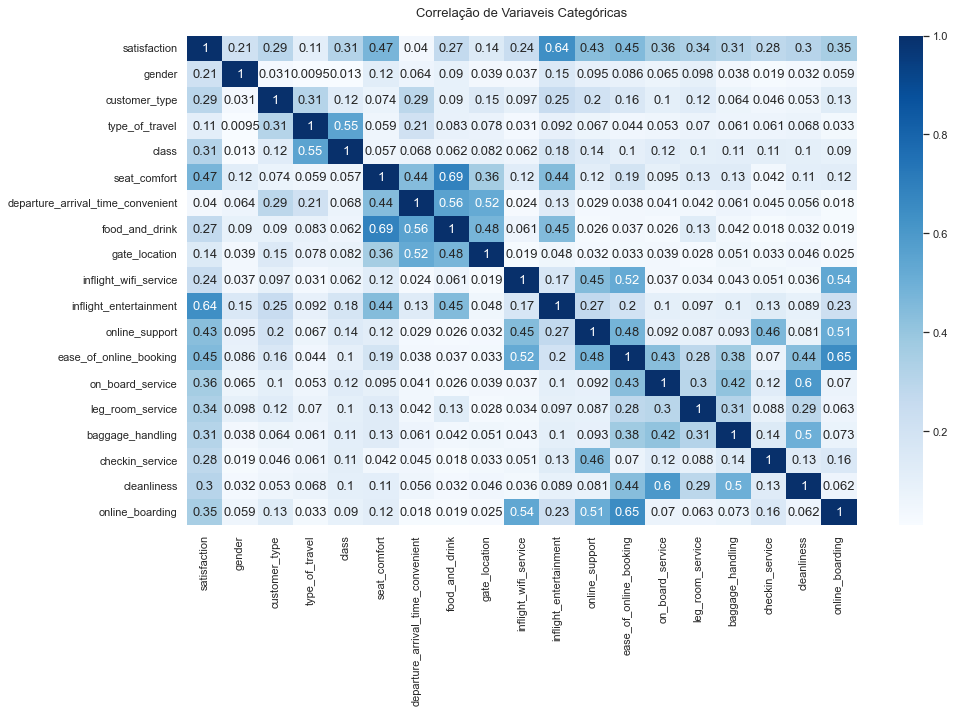

In [144]:
# Categorical variables
a = data[['satisfaction', 'gender', 'customer_type', 'type_of_travel', 'class', 'seat_comfort',
          'departure_arrival_time_convenient', 'food_and_drink', 'gate_location', 'inflight_wifi_service',
          'inflight_entertainment', 'online_support', 'ease_of_online_booking', 'on_board_service', 'leg_room_service',
          'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding']].astype('str')

# Function to show correlation
matrix = show_matrix(data=a, col='satisfaction', output='dict')

# Parse columns
data_columns = a.iloc[:, 1:]

# Apply function to show correlation matrix
for c in data_columns.columns:
    matrix[c] = show_matrix(data=a, col=c, output='list')

# Create figure
plt.figure(figsize=(15, 9))
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.title('Correlação de Variaveis Categóricas\n', fontsize=13);

O entretenimento do vôo é a variável que mais se correlaciona com a satisfação dos passageiros. Duas outras que estão menos, mas que ainda possui correlação, é o suporte online e a facilidade de reserva. Pergunta: Se melhorarmos estes serviços, a satisfação aumentará? bom, talvez, antes disso é importante analisar quais variaveis impactam também estes serviços.

No caso do entretenimento, há uma certa correlação com o conforto da poltrona e com as comidas/bebidas. Já o suporte online, se correlaciona com a facilidade de reserva online, serviço Wifi aéreo e com o embarque online. A facilidade de reserva, está correlacionada também com o Wifi aéreo, suporte online e com o embarque online, que há a maior correlação.

# 4.0 ENTREGA DA SOLUÇÃO

## 4.1 Perfil de passageiros insatisfeitos.

- **Classe:** Eco.

- **Viagens:** Pessoais e de Negócios.

- **Idade:** Passageiros com idade maior que 30 anos.

- **Sexo:** Maior parte masculinos.

- **Tipo:** Clientes fiéis.

## 4.2 Lista dos 5 serviços que mais causam insatisfação.

- Conforto da poltrona.
- Comida e bebida.
- Localização do portão.
- Previsão de chegada/partida do avião.
- Serviço WIFI

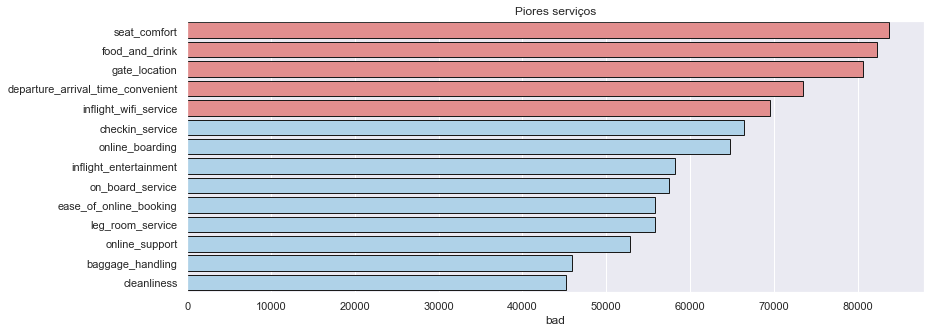

In [145]:
show_result()

## 4.3 Sugestões de melhorias.

Levando em consideração melhorias que será necessário baixo investimento e que ainda levará a um aumento de 15% na satisfação:

**Melhorias a serem feitas**:

- Comida e Bebida.
- Tempo de previsão chegada/saída do avião.
- Embarque online dos passageiros.
- Entretenimento no vôo.

## 4.4 Dashboard para acompanhamento da satisfação.

O Dashboard pode ser acessado [aqui](https://app.powerbi.com/view?r=eyJrIjoiYmZjMTMyZTgtMzI1Ni00N2FlLThjZGQtNTU2Y2VkMzhhMWJjIiwidCI6ImE2NWZjMjIxLWZhOGMtNGI0Yy1iMjJiLTJjYzExOGMyNTMxZiJ9&pageName=ReportSection77b4f8a7555d7590089a).